# REPORTE PRÁCTICA 11: Agrupamiento de datos

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio de los internos del CERESO "Apodaca" y el Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

El agrupamiento de datos o Clustering es una técnica de minería de datos (data mining) dentro de la disciplina de Inteligencia Artificial, que identifica de forma automática agrupaciones o clústeres de elementos de acuerdo a una medida de similitud entre ellos ([Técnicas de Clustering](https://www.cs.us.es/~fran/curso_unia/clustering.html)). El objetivo fundamental de las técnicas de clustering consiste en identificar grupos o clústeres de elementos tal que:

- La similitud media entre elementos del mismo clúster sea alta. Similitud intra-clúster alta.
- La similitud media entre elementos de distintos clústeres sea baja. Similitud inter-clúster baja.

La identificación de clústeres o grupos de elementos se basa en una medida de similitud. Diferentes medidas de similitud dan lugar a diferentes clústeres.

El objetivo de esta práctica consiste en probar tres algoritmos distintos para llevar a cabo un agrupamiento con por lo menos dos atributos de este caso de estudio, reportando los hallazgos con gráficas.

El [Algoritmo k-means](https://scikit-learn.org/stable/modules/clustering.html) es uno de los estudiados para realizar agrupamiento de datos, este va agrupando los datos al tratar de separar muestras en **n** grupos de igual varianza, minimizando un criterio conocido como la inercia o la suma de cuadrados dentro del grupo. Este algoritmo requiere que se especifique la cantidad de grupos (k) y se adapta bien a un gran número de muestras. El algoritmo k-means funciona dividiendo un conjunto de muestras en grupos separados, cada uno descrito por la media de las muestras en el grupo.

196 integrantes en grupo 0
114 integrantes en grupo 1
294 integrantes en grupo 2


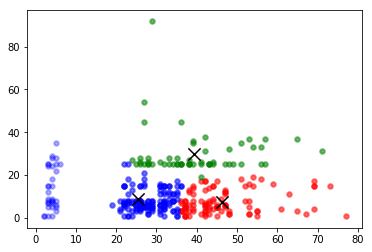

0.39119694939796246


In [22]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where


seed(42)
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 
keep = ['age', 'sentenceYears'] # dos atributos numéricos para comenzar
d = d.loc[:, keep]
d = d.dropna()
x = d.values
k = 3 # para 3 grupos
m = KMeans(init = 'random', n_clusters = k, n_init = 10)
m.fit(x)
centroides = m.cluster_centers_
grupos = m.predict(x)
plt.figure(1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)
colores = ['r', 'g', 'b']
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.3, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

En la gráfica se muestran tres grupos, donde al parecer los de arriba en color verde son los de edades cercanas a los 40 y con años de sentencia superiores a 20, los azules son los internos de menor edad y años de sentencia menores a 30, y los del último grupo en rojo, son los internos con edades mayor a 35 y se puede ver que los años de sentencia no son muy altos, son menores a 20. Para conocer los mejores valores del coeficiente de silueta, se prueba con diferentes valores de k entre 2 y 15.

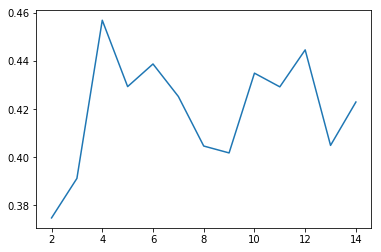

In [23]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from numpy import isnan, nan, take, where
from sklearn.cluster import KMeans

seed(13)
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 
keep = ['age', 'sentenceYears'] # dos atributos numéricos para comenzar
d = d.loc[:, keep]
d = d.dropna() # quitar los NAs
x = d.values
ks = [k for k in range(2, 15)]
sil = []
for k in ks:
    m = KMeans(init = 'random', n_clusters = k, n_init = 10)
    m.fit(x)
    sil.append(metrics.silhouette_score(x, m.predict(x), metric='euclidean'))
plt.figure(1)
plt.plot(ks, sil)
plt.show()

El algoritmo de [**MeanShift**](https://scikit-learn.org/stable/modules/clustering.html#mean-shift), que es otro ejemplo de algoritmo de agrupamiento, tiene como objetivo descubrir las burbujas en una densidad uniforme de muestras. Es un algoritmo basado en centroide, que funciona mediante la actualización de candidatos para que los centroides sean la media de los puntos dentro de una región determinada. Estos candidatos luego se filtran en una etapa de procesamiento posterior para eliminar los duplicados cercanos para formar el conjunto final de los centroides.

El algoritmo establece automáticamente el número de clústeres. No es altamente escalable este algoritmo, ya que requiere varias búsquedas de vecinos más cercanos durante la ejecución del algoritmo. El etiquetado de una nueva muestra se realiza encontrando el centroide más cercano para una muestra determinada.

number of estimated clusters : 6


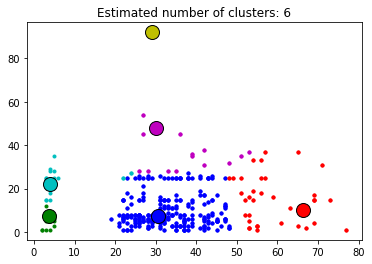

In [25]:
import numpy as np
import ssl
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where


if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 
keep = ['age', 'sentenceYears'] 
d = d.loc[:, keep]
d = d.dropna() 
X = d.values

centers = [[1, 1], [-1, -1], [1, -1]]
_ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Ploteando los resultados
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

El número de clusters arrojado por el algoritmo es 6, representado en diferentes colores en la gráfica anterior, evidenciando el grupo de mayor cantidad en color azul, que representan los internos con mayores edades  entre 20 y 50 años y con sentencias menores a 25 años, con media en el centroide azul igual a 30 años de edad.

Otro de los algoritmos de agrupamiento es el [**AffinityPropagation**](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) o propagación de afinidad, este trabaja creando clústeres y enviando mensajes entre pares de muestras hasta la convergencia. Luego se describe un conjunto de datos utilizando un pequeño número de ejemplares, que se identifican como los más representativos de otras muestras. Los mensajes enviados entre pares representan la idoneidad para que una muestra sea el ejemplar de la otra, que se actualiza en respuesta a los valores de otros pares. Esta actualización ocurre de manera iterativa hasta la convergencia, momento en el que se eligen los ejemplares finales y, por lo tanto, se proporciona la agrupación final. 

A continuación, se muestra el uso de este algoritmo con los datos del caso de estudio de los internos.

8 integrantes en grupo 0
20 integrantes en grupo 1
64 integrantes en grupo 2
30 integrantes en grupo 3
22 integrantes en grupo 4
18 integrantes en grupo 5
12 integrantes en grupo 6
30 integrantes en grupo 7
81 integrantes en grupo 8
30 integrantes en grupo 9
6 integrantes en grupo 10
31 integrantes en grupo 11
44 integrantes en grupo 12
43 integrantes en grupo 13
3 integrantes en grupo 14
24 integrantes en grupo 15
2 integrantes en grupo 16
18 integrantes en grupo 17
46 integrantes en grupo 18
8 integrantes en grupo 19
11 integrantes en grupo 20
14 integrantes en grupo 21
39 integrantes en grupo 22


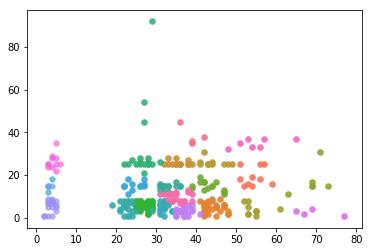

0.4367971496698043


In [17]:
import ssl
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, seed
from numpy import take, where, unique, concatenate
from sklearn.cluster import AffinityPropagation

seed(17)

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
d = pd.concat([o.loc[o.age >= 16], o.loc[~isnan(o.age)]]) 
keep = ['age', 'sentenceYears'] 
d = d.loc[:, keep]
d = d.dropna()
x = d.values

m = AffinityPropagation(damping = 0.9, convergence_iter = 30)
c = m.fit(x)
grupos = c.labels_
plt.clf()
plt.figure(1)
k = len(unique(grupos))
colores = sns.color_palette("husl", k)
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.6, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Utilizando el algoritmo de AffinityPropagation se crean muchos grupos, por lo cual no es un ejemplo de agrupamiento muy útil para el caso de estudio de esta práctica.